# Exercise 1

# Exercise 2
### Part (i)
The equations of motion for the position $x$, $y$ of a planet in its orbital plane are
<br><br>$$\frac{d^2x}{dt^2}= −GM \frac{x}{r^3}, \\   \frac{d^2y}{dt^2}= −GM \frac{y}{r^3},$$<br>
where $G = 6.6738×10^{-11} m^3 kg^{−1}s^{−2}$ is Newton’s gravitational constant, $M = 1.9891×10^{30} kg$
is the mass of the Sun, and $r =\sqrt{x^2 + y^2}$ which is the distance between two points.
<br><br>
Now we transform this system of two second order ODEs into an equivalent system of four first order ODEs.
<br><br>
$$\frac{dx}{dt}= v_x(t), \ \ \frac{dy}{dt}= v_y(t),$$
$$\frac{dv_x}{dt}= −GM \frac{x}{r^3}, \ \ \frac{dv_y}{dt}= −GM \frac{y}{r^3},$$

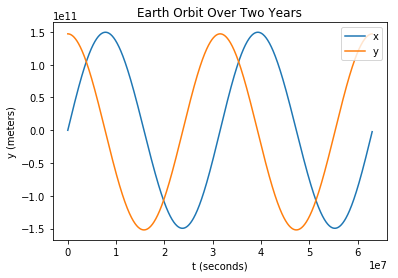

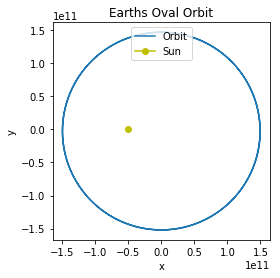

In [19]:
#Kaleb Kautzsch
#Part (ii)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import G

#Important constants
mSun = 1.9891e30 #In kg
con = -G*mSun #Constants G and mass of the Sun multiplied

#Function in terms of r and t changed into vectors and 2 second order ODE's into 4 first order ODE's
def f(r,t):
    x = r[0]
    y = r[1]
    radius = (x**2 + y**2)**(3/2)
    v_x = r[2] #Setting up derivatives in vectors
    v_y = r[3] #for x and y
    dx = v_x
    dy = v_y
    dv_x = con*x/radius
    dv_y = con*y/radius
    return np.array([dx,dy,dv_x,dv_y], float)

#Numerical parameters
s = 31536000 #Seconds in a year
start = 0
end = 2*s #Two years
N = 1000
stepSize = (end-start)/N

#Solution Vectors
tpoints = np.arange(start,end,stepSize)
xpoints = []
ypoints = []

#Initial Conditions
periDis = 1.4710e11 #Perihelion Distance in meters
periVel = 3.0287e4 #Perihelion Velocity in inverse ms
r = np.array([0,periDis,periVel,0], float)

#Use Runge-Kutta
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = stepSize*f(r,t)        
    k2 = stepSize*f(r+0.5*k1,t+0.5*stepSize)   
    k3 = stepSize*f(r+0.5*k2,t+0.5*stepSize)
    k4 = stepSize*f(r+k3,t+stepSize)
    r += (k1+2.*k2+2.*k3+k4)/6

#PLot Orbits
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.title("Earth Orbit Over Two Years")
plt.xlabel("t (seconds)")
plt.ylabel('y (meters)')
plt.legend(loc='upper right')
plt.show()

#Plot Oval Orbit
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(xpoints,ypoints, label='Orbit')
plt.plot(-0.5e11,0,marker='o',color='y', label='Sun')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Earths Oval Orbit')
plt.legend(loc='upper center')
plt.show()

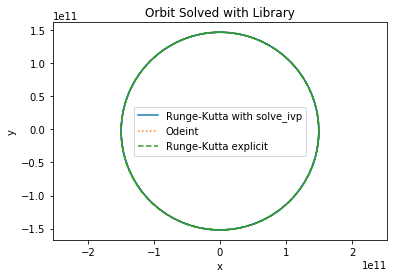

In [22]:
#Part(iii)
from scipy.integrate import solve_ivp, odeint

#Switch the order to avoid error
def fLib(t, r):
    return f(r, t)

#Initial Conditions
initial = [0.0,periDis,periVel,0.0] 

#Libraries solving 
solve = solve_ivp(fLib, (start, end), initial, method='RK45', rtol = 1e-8)
solve2 = odeint(f, initial, tpoints)

#Plot Orbits
plt.plot(solve.y[0], solve.y[1], label='Runge-Kutta with solve_ivp')
plt.plot(solve2[:,0], solve2[:,1], ':', label = 'Odeint')
plt.plot(xpoints, ypoints, '--', label='Runge-Kutta explicit')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Orbit Solved with Library')
plt.legend()
plt.gca().set_aspect('equal', 'datalim')
plt.show()

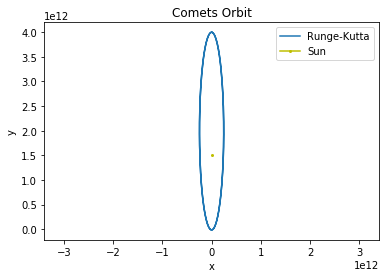

In [18]:
#Part (iv)
#Comet variables
comDis = 4e12 #In meters
comVel = 500 #In inverse ms
end = 100*s #Time is longer for a comet

#Initital Condtions
initial = [0.0,comDis,comVel,0.0]

#Using the library to solve
comSolve = solve_ivp(fLib, (start, end), initial, method='RK45', rtol=1e-8)

plt.plot(comSolve.y[0], comSolve.y[1], label='Runge-Kutta')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Comets Orbit')
plt.plot(0,1.5e12,marker='o', markersize='2',color='y', label='Sun')
plt.legend()
plt.gca().set_aspect('equal', 'datalim')
plt.show()

# Exercise 3

In [32]:
mEarth = 5.9722e24 #In kg
enrgy = []

#Define Energy Function
def energy(r):
    x = r[0]
    y = r[1]
    radius = (x**2 + y**2)**(3/2)
    v_x = r[2] #Setting up derivatives in vectors
    v_y = r[3] #for x and y
    dx = v_x
    dy = v_y
    radius = (x**2 + y**2)**(3/2)
    U = -G*mSun*mEarth/radius #Potential Energy
    T = 0.5*mEarth*(v_x+v_y)**2 #Kinetic Energy
    return U, T

start = 0
end = 2*s
N = 1000
stepSize = 3600

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    enrgy.append(energy(r))
    
    halfV = [(r[2]+r[3]) + ((con*x/radius) + (con*y/radius))*stepSize/2]      # update velocity half-way, acceleration saved from before
    r[0] += r[1]*stepSize
    current_accel = acceleration(r[0])    # update acceleration
    r[1] += current_accel*stepSize/2

NameError: name 'x' is not defined